In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# 전처리 -M,K를 백만과 천으로 바꾸고, like없애고 문자형태 바꾸고 전체 rep과 like합

In [138]:
#에피소드별 자료
ew_1 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_1_episode.csv')

ew_1['like_tot'] = ew_1['like_tot'].str.strip('like')
ew_1['like_tot'] = ew_1['like_tot'].str.replace(',', '').astype('int64')
#결측치 없고, 자료형태도 이상없지만 통일된게 좋아서 아래에서 데이터타입 float로 통일

ew_1

,url_list_a,title_a,ep_title_a,date_a,like_tot,num_list,rep_num
0,https://www.webtoons.com/en/romance/subzero/s2...,SubZero,(S2) Episode 97,01-Aug-21,62476,#101,1007
1,https://www.webtoons.com/en/romance/subzero/s2...,SubZero,(S2) Episode 96,25-Jul-21,79618,#100,2194
2,https://www.webtoons.com/en/romance/subzero/s2...,SubZero,(S2) Episode 95,18-Jul-21,85158,#99,1031
3,https://www.webtoons.com/en/romance/subzero/s2...,SubZero,(S2) Episode 94,11-Jul-21,92853,#98,1501
4,https://www.webtoons.com/en/romance/subzero/s2...,SubZero,(S2) Episode 93,04-Jul-21,102290,#97,1664
...,...,...,...,...,...,...,...
24976,https://www.webtoons.com/en/action/if/episode-...,IF,Episode 5,22-Mar-20,13205,#5,570
24977,https://www.webtoons.com/en/action/if/episode-...,IF,Episode 4,15-Mar-20,14372,#4,734
24978,https://www.webtoons.com/en/action/if/episode-...,IF,Episode 3,08-Mar-20,19363,#3,1307
24979,https://www.webtoons.com/en/action/if/episode-...,IF,Episode 2,08-Mar-20,20044,#2,985


In [139]:
#휴재작 삭제
all_rep_like = pd.DataFrame(ew_1.groupby(['title_a'])[['rep_num','like_tot']].sum()).reset_index()
all_rep_like

,title_a,rep_num,like_tot
0,#Blessed,42679,1701855
1,#Killstagram,196619,3273554
2,Acception,209701,9570168
3,Act Like You Love Me!,35911,1836825
4,Adventures of God,350175,23009030
...,...,...,...
214,Your Smile is a Trap,71265,3656755
215,Your Throne,131472,7622592
216,Zero Game,43625,2130445
217,microHUNTER,42547,2339878


In [140]:
ew_0 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_0_list_rank.csv')

#ew_0에서 M과 K로 숫자표기된 것들을 진짜 숫자로
Mlist1=[]
for i in ew_0['like_tot_sum']:
    if i[-1:] =='M':
        Mlist1.append(float(i[:-1])*1000000)
    elif i[-1:] =='K':
        Mlist1.append(float(i[:-1])*1000)
    else :
        Mlist1.append(float(i.replace(',', '')))

Mlist2=[]
for i in ew_0['subscribe']:
    if i[-1:] =='M':
        Mlist2.append(float(i[:-1])*1000000)
    elif i[-1:] =='K':
        Mlist2.append(float(i[:-1])*1000)
    else :
        Mlist2.append(float(i.replace(',', '')))

#기존 칼럼 대체
ew_0['like_tot_sum'] = Mlist1 
ew_0['subscribe'] = Mlist2

#웹툰별로 댓글수와 하트수 총 합계 만들기
all_rep_num =[]
all_heart_num =[]
for i in ew_0['title']:
    all_heart_num.append(float(all_rep_like[all_rep_like['title_a']==i]['like_tot']))
    all_rep_num.append(float(all_rep_like[all_rep_like['title_a']==i]['rep_num']))
    
ew_0['all_heart_num'] =all_heart_num
ew_0['all_rep_num'] = all_rep_num


#에피소드 갯수세기 -max_page와 실제 에피소드 갯수간 차이가 있음. 이 차이는 네이버에서 업로드 후 내린 경우에 발생하는것으로 파악됨
num_of_ep =[]
for title in ew_0['title']:
    num_of_ep.append(len(ew_1[ew_1['title_a']==title]))
ew_0['num_of_ep'] = num_of_ep

#작가넣기
author = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_NumOfWebtoonGroupbyAuthor.csv')
ew_0 = pd.concat([ew_0,author['num_of_webtoon']], axis=1)

#그림체넣기
style = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_picture_style.csv')
ew_0 = pd.concat([ew_0,style[['style_boy','style_romantic','style_cartoon','style_realitic','style_graphicnoble','style_etc']]], axis=1)
ew_0

,url_list,rate,title,author,description,genre,max_ep,like_tot_sum,subscribe,rank,...,all_heart_num,all_rep_num,num_of_ep,num_of_webtoon,style_boy,style_romantic,style_cartoon,style_realitic,style_graphicnoble,style_etc
0,https://www.webtoons.com/en/romance/subzero/li...,9.80,SubZero,Junepurrr,What would you sacrifice to save your family? ...,Romance,103,16000000.0,2500000.0,6.0,...,16056972.0,550863.0,101,NaN,1,0,0,0,0,0
1,https://www.webtoons.com/en/fantasy/the-first-...,9.64,The First Night With the Duke,MSG / Teava,"A handsome, selfish noble falls for a beautifu...",Fantasy,48,5200000.0,952200.0,14.0,...,5213830.0,103049.0,48,1.0,0,1,0,0,0,0
2,https://www.webtoons.com/en/romance/nice-to-me...,9.83,Nice To Meet You,Wishroomness,A ditsy university student Mew finds a lost st...,Romance,43,5100000.0,1100000.0,19.0,...,5193349.0,172922.0,43,NaN,0,1,0,0,0,0
3,https://www.webtoons.com/en/comedy/rooftops-an...,9.39,Rooftops & Roommates,Zaanart,"Jeb is an architecture major at university, ro...",Comedy,18,961486.0,332800.0,32.0,...,966172.0,7543.0,18,NaN,0,0,0,0,1,0
4,https://www.webtoons.com/en/horror/everything-...,9.72,Everything is Fine,Mike Birchall,"Sam and Maggie are a normal couple, in a norma...",Horror,18,1000000.0,388800.0,27.0,...,1083032.0,33994.0,18,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,https://www.webtoons.com/en/sf/seed/list?title...,9.70,Seed,Said P.,Welcome to the future – where our world has be...,Sci-fi,88,2500000.0,524700.0,167.0,...,2519843.0,49072.0,88,NaN,0,0,1,0,0,0
215,https://www.webtoons.com/en/drama/asterion/lis...,8.97,Asterion,NeverDraws,When Asterion wished upon a star for a better ...,Drama,28,212514.0,87400.0,184.0,...,212707.0,5287.0,28,NaN,0,0,0,0,1,0
216,https://www.webtoons.com/en/drama/american-roa...,9.56,American Road Trip,Patrick Flores-Scott / Little Corvus,"Ever since his brother left to serve in Iraq, ...",Drama,48,307844.0,102700.0,188.0,...,307987.0,6700.0,48,NaN,1,0,0,0,0,0
217,https://www.webtoons.com/en/drama/the-shadow-p...,9.53,The Shadow Prophet,Anne Delseit / Marissa Delbressine,The Great Prophet Godo has a place for everyon...,Drama,41,294261.0,90900.0,200.0,...,294311.0,7761.0,41,NaN,0,0,1,0,0,0


# 감성사전점수넣기

In [9]:
ew_0 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_0_list_rank2.csv', encoding='utf-8-sig')
ew_0

,Unnamed: 0,url_list,rate,title,author,description,genre,max_ep,like_tot_sum,subscribe,...,all_heart_num,all_rep_num,num_of_ep,num_of_webtoon,style_boy,style_romantic,style_cartoon,style_realitic,style_graphicnoble,style_etc
0,0,https://www.webtoons.com/en/romance/subzero/li...,9.80,SubZero,Junepurrr,What would you sacrifice to save your family? ...,Romance,103,16000000.0,2500000.0,...,16056972.0,550863.0,101,NaN,1,0,0,0,0,0
1,1,https://www.webtoons.com/en/fantasy/the-first-...,9.64,The First Night With the Duke,MSG / Teava,"A handsome, selfish noble falls for a beautifu...",Fantasy,48,5200000.0,952200.0,...,5213830.0,103049.0,48,1.0,0,1,0,0,0,0
2,2,https://www.webtoons.com/en/romance/nice-to-me...,9.83,Nice To Meet You,Wishroomness,A ditsy university student Mew finds a lost st...,Romance,43,5100000.0,1100000.0,...,5193349.0,172922.0,43,NaN,0,1,0,0,0,0
3,3,https://www.webtoons.com/en/comedy/rooftops-an...,9.39,Rooftops & Roommates,Zaanart,"Jeb is an architecture major at university, ro...",Comedy,18,961486.0,332800.0,...,966172.0,7543.0,18,NaN,0,0,0,0,1,0
4,4,https://www.webtoons.com/en/horror/everything-...,9.72,Everything is Fine,Mike Birchall,"Sam and Maggie are a normal couple, in a norma...",Horror,18,1000000.0,388800.0,...,1083032.0,33994.0,18,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,https://www.webtoons.com/en/sf/seed/list?title...,9.70,Seed,Said P.,Welcome to the future – where our world has be...,Sci-fi,88,2500000.0,524700.0,...,2519843.0,49072.0,88,NaN,0,0,1,0,0,0
215,215,https://www.webtoons.com/en/drama/asterion/lis...,8.97,Asterion,NeverDraws,When Asterion wished upon a star for a better ...,Drama,28,212514.0,87400.0,...,212707.0,5287.0,28,NaN,0,0,0,0,1,0
216,216,https://www.webtoons.com/en/drama/american-roa...,9.56,American Road Trip,Patrick Flores-Scott / Little Corvus,"Ever since his brother left to serve in Iraq, ...",Drama,48,307844.0,102700.0,...,307987.0,6700.0,48,NaN,1,0,0,0,0,0
217,217,https://www.webtoons.com/en/drama/the-shadow-p...,9.53,The Shadow Prophet,Anne Delseit / Marissa Delbressine,The Great Prophet Godo has a place for everyon...,Drama,41,294261.0,90900.0,...,294311.0,7761.0,41,NaN,0,0,1,0,0,0


In [16]:
ew_2_comment = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_2_comment_score_2.csv', encoding='utf-8-sig')

#senti pos값에서 neg값 빼기
ew_2_comment['senti_pos-neg'] = ew_2_comment.apply(lambda x: x['senti_pos'] - x['senti_neg'], axis = 1)
ew_2_comment

,url_list_a,title_a,ep_title_a,date_a,like_tot,num_list,rep_num,best_comment,senti_pos,senti_neg,imdb,FoDoDic,senti_pos-neg
0,https://www.webtoons.com/en/sf/room-of-swords/...,Room of Swords,(S2) Ep. 76,05-Aug-19,"34,282",#78,941,"TOPNepthys: Now people, let's not disturb Gyru...",0.000,1.625,0.500000,-0.500000,-1.625
1,https://www.webtoons.com/en/action/pound/s2-ep...,Pound,[S2] Episode 2,08-Oct-19,"3,770",#32,61,This seems like a definite HIV hazard,0.875,0.375,0.500000,0.137117,0.500
2,https://www.webtoons.com/en/comedy/boyfriend-o...,Boyfriend of the Dead,Ep. 171 - Herbarium,31-May-19,"93,062",#188,"1,579",Can we just talk about how the person in the b...,0.000,0.250,0.500000,0.500000,-0.250
3,https://www.webtoons.com/en/comedy/everywhere-...,Everywhere & Nowhere,Ep. 165,10-Jan-21,"35,723",#167,555,"Hmm, I'm gonna hazard a guess and say that thi...",2.750,1.000,0.500000,0.500000,1.750
4,https://www.webtoons.com/en/sf/denma/chapter-3...,Denma,[Chapter 3] 1. Dike (118),01-Apr-21,"1,122",#1114,18,Hazz has the insight to guess what they guesse...,0.125,0.250,0.500000,-0.023006,-0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374132,https://www.webtoons.com/en/slice-of-life/my-g...,My Giant Nerd Boyfriend,527: Maths,09-Dec-20,"68,433",#527,"2,794","to all those who are afraid of math, I scored ...",1.500,4.500,0.000056,-0.274802,-3.000
374133,https://www.webtoons.com/en/romance/nice-to-me...,Nice To Meet You,Episode 37,08-Feb-21,"112,081",#37,"6,148",patience patience patience patience patience p...,18.750,0.000,0.000036,-0.062835,18.750
374134,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 615 - Life,14-Oct-20,"22,497",#615,590,nope nope nope nope nope nope nope nope nope n...,0.000,0.000,0.000025,-0.062835,0.000
374135,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 625 - Rated 18+,18-Nov-20,"21,276",#625,283,avoid it at ALL costs,0.000,0.000,0.000022,0.072546,0.000


In [17]:
#스케일링

#senti 스케일링. pos점수-neg점수의 98.2%가 -2~2사이에 위치. -2~2밖의 점수는 -2와 2로 치환하고 스케일링  
i_list=[]
for i in ew_2_comment['senti_pos-neg']:
    if i <-2:
        i_list.append(-2)
    elif i>2:
        i_list.append(2)
    else:
        i_list.append(i)
ew_2_comment['senti_pos-neg'] = i_list
ew_2_comment['senti_pos-neg'] = ew_2_comment['senti_pos-neg']/4

#imdb스케일링
ew_2_comment['imdb'] = ew_2_comment['imdb']-0.5
ew_2_comment

,url_list_a,title_a,ep_title_a,date_a,like_tot,num_list,rep_num,best_comment,senti_pos,senti_neg,imdb,FoDoDic,senti_pos-neg
0,https://www.webtoons.com/en/sf/room-of-swords/...,Room of Swords,(S2) Ep. 76,05-Aug-19,"34,282",#78,941,"TOPNepthys: Now people, let's not disturb Gyru...",0.000,1.625,0.000000,-0.500000,-0.40625
1,https://www.webtoons.com/en/action/pound/s2-ep...,Pound,[S2] Episode 2,08-Oct-19,"3,770",#32,61,This seems like a definite HIV hazard,0.875,0.375,0.000000,0.137117,0.12500
2,https://www.webtoons.com/en/comedy/boyfriend-o...,Boyfriend of the Dead,Ep. 171 - Herbarium,31-May-19,"93,062",#188,"1,579",Can we just talk about how the person in the b...,0.000,0.250,0.000000,0.500000,-0.06250
3,https://www.webtoons.com/en/comedy/everywhere-...,Everywhere & Nowhere,Ep. 165,10-Jan-21,"35,723",#167,555,"Hmm, I'm gonna hazard a guess and say that thi...",2.750,1.000,0.000000,0.500000,0.43750
4,https://www.webtoons.com/en/sf/denma/chapter-3...,Denma,[Chapter 3] 1. Dike (118),01-Apr-21,"1,122",#1114,18,Hazz has the insight to guess what they guesse...,0.125,0.250,0.000000,-0.023006,-0.03125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374132,https://www.webtoons.com/en/slice-of-life/my-g...,My Giant Nerd Boyfriend,527: Maths,09-Dec-20,"68,433",#527,"2,794","to all those who are afraid of math, I scored ...",1.500,4.500,-0.499944,-0.274802,-0.50000
374133,https://www.webtoons.com/en/romance/nice-to-me...,Nice To Meet You,Episode 37,08-Feb-21,"112,081",#37,"6,148",patience patience patience patience patience p...,18.750,0.000,-0.499964,-0.062835,0.50000
374134,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 615 - Life,14-Oct-20,"22,497",#615,590,nope nope nope nope nope nope nope nope nope n...,0.000,0.000,-0.499975,-0.062835,0.00000
374135,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 625 - Rated 18+,18-Nov-20,"21,276",#625,283,avoid it at ALL costs,0.000,0.000,-0.499978,0.072546,0.00000


In [18]:
#LDA로 만들어진 토픽 넣기
attribute=pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/en_attribute.csv')
ew_2_comment['attribute'] = attribute['attribute_num2']
ew_2_comment

,url_list_a,title_a,ep_title_a,date_a,like_tot,num_list,rep_num,best_comment,senti_pos,senti_neg,imdb,FoDoDic,senti_pos-neg,attribute
0,https://www.webtoons.com/en/sf/room-of-swords/...,Room of Swords,(S2) Ep. 76,05-Aug-19,"34,282",#78,941,"TOPNepthys: Now people, let's not disturb Gyru...",0.000,1.625,0.000000,-0.500000,-0.40625,1
1,https://www.webtoons.com/en/action/pound/s2-ep...,Pound,[S2] Episode 2,08-Oct-19,"3,770",#32,61,This seems like a definite HIV hazard,0.875,0.375,0.000000,0.137117,0.12500,1
2,https://www.webtoons.com/en/comedy/boyfriend-o...,Boyfriend of the Dead,Ep. 171 - Herbarium,31-May-19,"93,062",#188,"1,579",Can we just talk about how the person in the b...,0.000,0.250,0.000000,0.500000,-0.06250,2
3,https://www.webtoons.com/en/comedy/everywhere-...,Everywhere & Nowhere,Ep. 165,10-Jan-21,"35,723",#167,555,"Hmm, I'm gonna hazard a guess and say that thi...",2.750,1.000,0.000000,0.500000,0.43750,2
4,https://www.webtoons.com/en/sf/denma/chapter-3...,Denma,[Chapter 3] 1. Dike (118),01-Apr-21,"1,122",#1114,18,Hazz has the insight to guess what they guesse...,0.125,0.250,0.000000,-0.023006,-0.03125,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374132,https://www.webtoons.com/en/slice-of-life/my-g...,My Giant Nerd Boyfriend,527: Maths,09-Dec-20,"68,433",#527,"2,794","to all those who are afraid of math, I scored ...",1.500,4.500,-0.499944,-0.274802,-0.50000,3
374133,https://www.webtoons.com/en/romance/nice-to-me...,Nice To Meet You,Episode 37,08-Feb-21,"112,081",#37,"6,148",patience patience patience patience patience p...,18.750,0.000,-0.499964,-0.062835,0.50000,1
374134,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 615 - Life,14-Oct-20,"22,497",#615,590,nope nope nope nope nope nope nope nope nope n...,0.000,0.000,-0.499975,-0.062835,0.00000,3
374135,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 625 - Rated 18+,18-Nov-20,"21,276",#625,283,avoid it at ALL costs,0.000,0.000,-0.499978,0.072546,0.00000,3


In [19]:
#num_list 정수형으로
ew_2_comment['num_list'] = ew_2_comment['num_list'].str.replace('#', '').astype('int64')
ew_2_comment

,url_list_a,title_a,ep_title_a,date_a,like_tot,num_list,rep_num,best_comment,senti_pos,senti_neg,imdb,FoDoDic,senti_pos-neg,attribute
0,https://www.webtoons.com/en/sf/room-of-swords/...,Room of Swords,(S2) Ep. 76,05-Aug-19,"34,282",78,941,"TOPNepthys: Now people, let's not disturb Gyru...",0.000,1.625,0.000000,-0.500000,-0.40625,1
1,https://www.webtoons.com/en/action/pound/s2-ep...,Pound,[S2] Episode 2,08-Oct-19,"3,770",32,61,This seems like a definite HIV hazard,0.875,0.375,0.000000,0.137117,0.12500,1
2,https://www.webtoons.com/en/comedy/boyfriend-o...,Boyfriend of the Dead,Ep. 171 - Herbarium,31-May-19,"93,062",188,"1,579",Can we just talk about how the person in the b...,0.000,0.250,0.000000,0.500000,-0.06250,2
3,https://www.webtoons.com/en/comedy/everywhere-...,Everywhere & Nowhere,Ep. 165,10-Jan-21,"35,723",167,555,"Hmm, I'm gonna hazard a guess and say that thi...",2.750,1.000,0.000000,0.500000,0.43750,2
4,https://www.webtoons.com/en/sf/denma/chapter-3...,Denma,[Chapter 3] 1. Dike (118),01-Apr-21,"1,122",1114,18,Hazz has the insight to guess what they guesse...,0.125,0.250,0.000000,-0.023006,-0.03125,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374132,https://www.webtoons.com/en/slice-of-life/my-g...,My Giant Nerd Boyfriend,527: Maths,09-Dec-20,"68,433",527,"2,794","to all those who are afraid of math, I scored ...",1.500,4.500,-0.499944,-0.274802,-0.50000,3
374133,https://www.webtoons.com/en/romance/nice-to-me...,Nice To Meet You,Episode 37,08-Feb-21,"112,081",37,"6,148",patience patience patience patience patience p...,18.750,0.000,-0.499964,-0.062835,0.50000,1
374134,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 615 - Life,14-Oct-20,"22,497",615,590,nope nope nope nope nope nope nope nope nope n...,0.000,0.000,-0.499975,-0.062835,0.00000,3
374135,https://www.webtoons.com/en/comedy/safely-enda...,Safely Endangered,Ep. 625 - Rated 18+,18-Nov-20,"21,276",625,283,avoid it at ALL costs,0.000,0.000,-0.499978,0.072546,0.00000,3


In [24]:
#웹툰별 감성점수 피봇
wb_score = pd.DataFrame(ew_2_comment.groupby(['title_a', 'attribute'])[['imdb', 'senti_pos-neg','FoDoDic']].mean()).reset_index()

#에피소드별 감성점수 피봇
ep_score = pd.DataFrame(ew_2_comment.groupby(['title_a', 'num_list', 'attribute'])[['imdb', 'senti_pos-neg','FoDoDic']].sum()).reset_index()

wb_score#mean

,title_a,attribute,imdb,senti_pos-neg,FoDoDic
0,#Blessed,1,-0.015551,0.018423,0.165101
1,#Blessed,2,-0.011496,0.027112,0.155989
2,#Blessed,3,-0.017366,0.022368,0.170959
3,#Killstagram,1,-0.040037,-0.034028,0.092755
4,#Killstagram,2,-0.054070,-0.029960,0.107105
...,...,...,...,...,...
652,microHUNTER,2,-0.008295,0.002433,0.040744
653,microHUNTER,3,-0.009434,0.014957,0.053798
654,unOrdinary,1,0.018200,0.011714,0.081576
655,unOrdinary,2,0.039435,0.012355,0.081418


In [25]:
ep_score

,title_a,num_list,attribute,imdb,senti_pos-neg,FoDoDic
0,#Blessed,1,1,0.231989,0.40625,2.819101
1,#Blessed,1,2,-0.409585,0.06250,0.468402
2,#Blessed,1,3,0.464231,0.00000,1.803240
3,#Blessed,2,1,-0.761603,0.56250,2.482998
4,#Blessed,2,2,-0.758098,-0.12500,0.676412
...,...,...,...,...,...,...
73590,unOrdinary,240,2,0.506998,0.34375,0.260551
73591,unOrdinary,240,3,-0.324306,0.18750,0.417993
73592,unOrdinary,241,1,2.017146,1.31250,2.784403
73593,unOrdinary,241,2,2.237553,1.15625,2.913871


In [26]:
#웹툰 에피소드별로 각 감성사전 점수를 합치기

imdb_ep_score1=[]
imdb_ep_score2=[]
imdb_ep_score3=[]
senti_ep_score1=[]
senti_ep_score2=[]
senti_ep_score3=[]
FoDoDic_ep_score1=[]
FoDoDic_ep_score2=[]
FoDoDic_ep_score3=[]

for v,i in tqdm(enumerate(ew_0['title'])):
    k=int(ew_0['num_of_ep'][v])  #한 웹툰의 에피소드 갯수. subzero는 101부터 98까지.
    for j in range(k-1, k-5, -1):
        try : imdb_ep_score1.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==1)  ]['imdb']))
        except: imdb_ep_score1.append(0)
        try : imdb_ep_score2.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==2)  ]['imdb']))
        except:imdb_ep_score2.append(0)
        try : imdb_ep_score3.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==3)  ]['imdb']))
        except:imdb_ep_score3.append(0)
        
        try : senti_ep_score1.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==1)  ]['senti_pos-neg']))
        except:senti_ep_score1.append(0)
        try : senti_ep_score2.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==2)  ]['senti_pos-neg']))
        except:senti_ep_score2.append(0)
        try : senti_ep_score3.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==3)  ]['senti_pos-neg']))
        except:senti_ep_score3.append(0)
        
        try : FoDoDic_ep_score1.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==1)  ]['FoDoDic']))
        except:FoDoDic_ep_score1.append(0)
        try : FoDoDic_ep_score2.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==2)  ]['FoDoDic']))
        except:FoDoDic_ep_score2.append(0)
        try : FoDoDic_ep_score3.append(float(ep_score[ (ep_score['title_a']==i) & (ep_score['num_list']==j) & (ep_score['attribute']==3)  ]['FoDoDic']))
        except:FoDoDic_ep_score3.append(0)
            
# np.mean(imdb_score_1[0:4])   #101화부터 98화까지 모든 imdb의 평균        


219it [00:58,  3.77it/s]


In [27]:
a_wt_heart =[]
a_wt_rep =[]
imdb1=[]
imdb2=[]
imdb3=[]
senti1=[]
senti2=[]
senti3=[]
FoDoDic1=[]
FoDoDic2=[]
FoDoDic3=[]

like4=[]
rep4=[]
recent_like4=[]
recent_rep4=[]

imdb1_4=[]
imdb2_4=[]
imdb3_4=[]
senti1_4=[]
senti2_4=[]
senti3_4=[]
FoDoDic1_4=[]
FoDoDic2_4=[]
FoDoDic3_4=[]

slope_like = []
slope_rep = []
slope_like_4 = []
slope_rep_4 = []

for v,i in tqdm(enumerate(ew_0['title'])):
    #한 웹툰 전체 하트 평균
    a_wt_heart.append( ew_1[ew_1['title_a']==i]['like_tot'].mean())
    #한 웹툰 전체 댓글수 평균
    a_wt_rep.append( ew_1[ew_1['title_a']==i]['rep_num'].mean())
    
    #한 웹툰 전체 하트 기울기
    x1 = ew_1[ew_1['title_a']==i].index.values.reshape(-1, 1)
    y1 = ew_1[ew_1['title_a']==i]['like_tot'].values.reshape(-1, 1)
    reg.fit(x1, y1)
    slope_like.append(reg.coef_)
    
    #한 웹툰 전체 댓글수 기울기
    x2 = ew_1[ew_1['title_a']==i].index.values.reshape(-1, 1)
    y2 = ew_1[ew_1['title_a']==i]['rep_num'].values.reshape(-1, 1)
    reg.fit(x2, y2)
    slope_rep.append(reg.coef_)
    
    ######
    
    #최근4회 하트평균
    like4.append(ew_1[ew_1['title_a']==i][1:5]['like_tot'].mean())
    recent_like4.append(ew_1[ew_1['title_a']==i][0:4]['like_tot'].mean())
    #최근4회 댓글수평균
    rep4.append(ew_1[ew_1['title_a']==i][1:5]['rep_num'].mean())
    recent_rep4.append(ew_1[ew_1['title_a']==i][0:4]['rep_num'].mean())
    #최근4회 하트기울기
    x3 = ew_1[ew_1['title_a']==i][1:5].index.values.reshape(-1, 1)
    y3 = ew_1[ew_1['title_a']==i][1:5]['like_tot'].values.reshape(-1, 1)
    reg.fit(x3, y3)
    slope_like_4.append(reg.coef_)    

    #최근4회 댓글기울기
    x4 = ew_1[ew_1['title_a']==i][1:5].index.values.reshape(-1, 1)
    y4 = ew_1[ew_1['title_a']==i][1:5]['rep_num'].values.reshape(-1, 1)
    reg.fit(x4, y4)
    slope_rep_4.append(reg.coef_) 

    
    #최근4회 imdb 속성1
    imdb1_4.append( sum(imdb_ep_score1[v*4:(v+1)*4]))                  
    #최근4회 imdb 속성2                  
    imdb2_4.append( sum(imdb_ep_score2[v*4:(v+1)*4]) )                 
    #최근4회 imdb 속성3           
    imdb3_4.append( sum(imdb_ep_score3[v*4:(v+1)*4])  )                
    
    #최근4회 senti 속성1
    senti1_4.append( sum(senti_ep_score1[v*4:(v+1)*4]) )                 
    #최근4회 senti 속성2                  
    senti2_4.append( sum(senti_ep_score2[v*4:(v+1)*4])  )                    
    #최근4회 isenti 속성3       
    senti3_4.append( sum(senti_ep_score3[v*4:(v+1)*4])  )
    
    #최근4회 FoDoDic 속성1
    FoDoDic1_4.append( sum(FoDoDic_ep_score1[v*4:(v+1)*4]) )                 
    #최근4회 FoDoDic 속성2                  
    FoDoDic2_4.append( sum(FoDoDic_ep_score2[v*4:(v+1)*4])  )                    
    #최근4회 FoDoDic 속성3       
    FoDoDic3_4.append( sum(FoDoDic_ep_score3[v*4:(v+1)*4])  )
    
    #########             
                 
    #한 웹툰 전체 속성1 감성 imdb 평균
    try : imdb1.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==1)  ]['imdb']))
    except: imdb1.append(0)
    #한 웹툰 전체 속성2 감성 imdb 평균
    try : imdb2.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==2)  ]['imdb']))
    except: imdb2.append(0)
    #한 웹툰 전체 속성3 감성 imdb 평균
    try : imdb3.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==3)  ]['imdb']))
    except: imdb3.append(0)       
    
    #한 웹툰 전체 속성1 감성 senti 평균
    try : senti1.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==1)  ]['senti_pos-neg']))
    except: senti1.append(0)
    #한 웹툰 전체 속성2 감성 senti 평균
    try : senti2.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==2)  ]['senti_pos-neg']))
    except: senti2.append(0)
    #한 웹툰 전체 속성3 감성 senti 평균
    try : senti3.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==3)  ]['senti_pos-neg']))
    except: senti3.append(0)

    #한 웹툰 전체 속성1 감성 FoDoDic 평균
    try : FoDoDic1.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==1)  ]['FoDoDic']))
    except: FoDoDic1.append(0)
    #한 웹툰 전체 속성2 감성 FoDoDic 평균
    try : FoDoDic2.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==2)  ]['FoDoDic']))
    except: FoDoDic2.append(0)
    #한 웹툰 전체 속성3 감성 FoDoDic 평균
    try : FoDoDic3.append(float( wb_score[  (wb_score['title_a']==i) & (wb_score['attribute']==3)  ]['FoDoDic']))
    except: FoDoDic3.append(0)
                     
ew_0['a_wt_heart'] = a_wt_heart
ew_0['a_wt_rep'] = a_wt_rep
               
ew_0['like4'] = like4                
ew_0['rep4'] = rep4
ew_0['recent_like4'] = recent_like4
ew_0['recent_rep4'] = recent_rep4
ew_0['slope_heart'] = slope_like
ew_0['slope_rep'] = slope_rep

ew_0['imdb1'] =imdb1                 
ew_0['imdb2'] =   imdb2              
ew_0['imdb3'] = imdb3                
ew_0['senti1'] = senti1                
ew_0['senti2'] = senti2                
ew_0['senti3'] = senti3 
ew_0['FoDoDic1'] = FoDoDic1                
ew_0['FoDoDic2'] = FoDoDic2                
ew_0['FoDoDic3'] = FoDoDic3 

ew_0['imdb1_4'] =  imdb1_4               
ew_0['imdb2_4'] =  imdb2_4               
ew_0['imdb3_4'] =  imdb3_4               
ew_0['senti1_4'] = senti1_4                
ew_0['senti2_4'] = senti2_4                
ew_0['senti3_4'] = senti3_4 
ew_0['FoDoDic1_4'] = FoDoDic1_4                
ew_0['FoDoDic2_4'] = FoDoDic2_4                
ew_0['FoDoDic3_4'] = FoDoDic3_4 

ew_0['slope_heart_4'] = slope_like_4
ew_0['slope_rep_4'] = slope_rep_4

#로그
ew_0['recent_like4'] = np.log2(ew_0['recent_like4'])
ew_0['recent_rep4'] = np.log2(ew_0['recent_rep4'])
ew_0['like4'] = np.log2(ew_0['like4'])
ew_0['rep4'] = np.log2(ew_0['rep4'])
ew_0['subscribe'] = np.log2(ew_0['subscribe'])

#[[실수]]로 나오는거 실수화
for i in ['slope_heart','slope_rep','slope_rep_4','slope_heart_4']:
    ew_0[i] = ew_0[i].astype('float64')
    ew_0[i] = ew_0[i].astype('float64')
    
ew_0

0it [00:00, ?it/s]


NameError: name 'ew_1' is not defined

# minmaxscale

In [29]:
#스케일링은 아래것만
ew_0_numeric = ew_0[['rate', 'like_tot_sum', 'all_heart_num','all_rep_num','like4','rep4','subscribe','recent_like4','recent_rep4', 'rank', 'a_wt_heart', 'a_wt_rep', 'slope_heart', 'slope_rep', 'slope_heart_4', 'slope_rep_4']]
ew_0_numeric

,rate,like_tot_sum,all_heart_num,all_rep_num,like4,rep4,subscribe,recent_like4,recent_rep4,rank,a_wt_heart,a_wt_rep,slope_heart,slope_rep,slope_heart_4,slope_rep_4
0,9.80,16000000.0,16056972.0,550863.0,16.457313,10.641600,21.253497,16.288186,10.485075,6.0,158979.920792,5454.089109,450.564881,-12.394490,7571.1,-112.0
1,9.64,5200000.0,5213830.0,103049.0,16.327553,10.647009,19.860905,16.159418,10.531138,14.0,108621.458333,2146.854167,1032.087060,14.804114,7072.4,165.4
2,9.83,5100000.0,5193349.0,172922.0,16.792673,12.993160,20.069072,16.589117,12.762330,19.0,120775.558140,4021.441860,818.920719,-83.372093,10197.1,289.9
3,9.39,961486.0,966172.0,7543.0,15.228687,8.459432,18.344296,14.992241,8.668885,32.0,53676.222222,419.055556,2779.488132,12.964912,6066.8,-38.2
4,9.72,1000000.0,1083032.0,33994.0,15.593508,10.471167,18.568669,15.461296,10.341519,27.0,60168.444444,1888.555556,2044.990712,123.890609,2642.8,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,9.70,2500000.0,2519843.0,49072.0,13.018070,7.092757,19.001133,12.885220,6.820179,167.0,28634.579545,557.636364,547.614869,12.159487,401.9,27.8
215,8.97,212514.0,212707.0,5287.0,12.056976,7.179909,16.415346,11.958825,7.139551,184.0,7596.678571,188.821429,431.030378,10.785714,222.4,-12.4
216,9.56,307844.0,307987.0,6700.0,11.594791,5.707359,16.648077,11.489346,5.741467,188.0,6416.395833,139.583333,222.720419,6.266826,203.2,0.5
217,9.53,294261.0,294311.0,7761.0,11.709192,6.873444,16.471993,11.661889,7.245553,200.0,7178.317073,189.292683,278.033624,4.395645,184.1,8.1


In [30]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(ew_0_numeric)
print(fitted.data_max_)
ew_0_scale = min_max_scaler.transform(ew_0_numeric)
ew_0_scale = pd.DataFrame(ew_0_scale, columns=ew_0_numeric.columns)

for i in ew_0_scale.columns:
    ew_0[i] = ew_0_scale[i]
ew_0

[9.93000000e+00 4.91000000e+07 4.91547890e+07 2.48510400e+06
 1.75353969e+01 1.32620214e+01 2.25869204e+01 1.74309078e+01
 1.29719925e+01 2.17500000e+02 2.45472620e+05 1.26103882e+04
 5.03626615e+03 1.33613636e+02 1.37690000e+04 2.49120000e+03]
         rate  like_tot_sum  all_heart_num  all_rep_num     like4      rep4  \
0    0.955172      0.325665       0.326461     0.221406  0.882789  0.703430   
1    0.900000      0.105641       0.105804     0.041147  0.868681  0.704042   
2    0.965517      0.103603       0.105387     0.069273  0.919250  0.969571   
3    0.813793      0.019291       0.019364     0.002703  0.749210  0.456460   
4    0.927586      0.020075       0.021742     0.013350  0.788874  0.684141   
..        ...           ...            ...          ...       ...       ...   
214  0.920690      0.050634       0.050981     0.019419  0.508867  0.301784   
215  0.668966      0.004032       0.004031     0.001794  0.404375  0.311648   
216  0.872414      0.005974       0.005970  

# 타겟구하기

In [2]:
ew_0['recent_like4']

0      0.874088
1      0.859900
2      0.907246
3      0.731293
4      0.782976
         ...   
214    0.499128
215    0.397053
216    0.345323
217    0.364334
218    0.484336
Name: recent_like4, Length: 219, dtype: float64

In [3]:
#휴재목록
Closed = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_closed_list.csv')
closed = Closed['Closed']
closed

0                             Supersonic Girl
1                          The Shadow Prophet
2                    Unlucky is as Lucky does
3                        Cursed Princess Club
4                                  unOrdinary
5                               City of Blank
6                                  Simon Sues
7                                 Heir's Game
8                          Little Matcha Girl
9                                        Deor
10                      Boyfriend of the Dead
11                                  Space Boy
12                               The Kiss Bet
13                               CinnamonRoll
14                                    EMPYREA
15                                    KILLMAX
16                      My Dictator Boyfriend
17                                       Skye
18                               The Red King
19                     The Red Hook: Blackout
20                                      Edith
21                       Trailer P

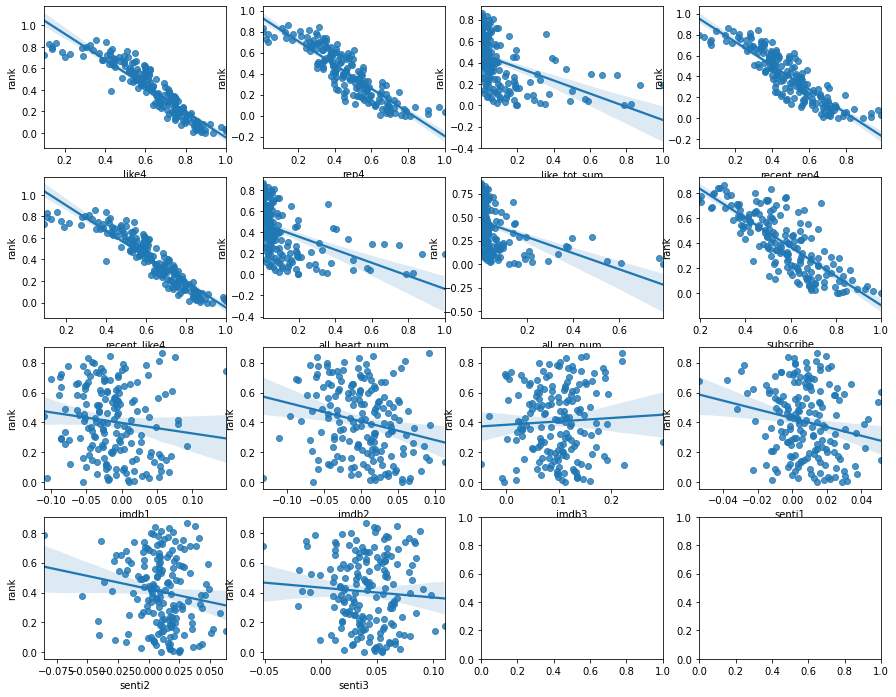

In [4]:
#불필요한 칼럼과 휴재중인 웹툰 행 제거한 df만들기
data = ew_0.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','url_list'], axis='columns')
for i in closed.tolist():
    data = data.drop( data[data['title'] ==i].index )

    
#산점도 선형회귀 시각화
fig, axs = plt.subplots(figsize=(15,12), nrows=4, ncols=4)
x_features = ['like4','rep4','like_tot_sum','recent_rep4','recent_like4','all_heart_num','all_rep_num','subscribe','imdb1','imdb2','imdb3','senti1','senti2','senti3',]

    
for i, feature in enumerate(x_features):    #인덱스와 밸류 같이 가져오는 enumerate를 쓰고, i, feature 사용
    row=int(i/4)  #행번호 
    col = i%4     #열번호
    #산점도와 회귀선 시각화
    sns.regplot(x=feature, y='rank', data=data, ax=axs[row][col])


In [5]:
#최근4화의 의 합
data['rep4_rank']=data['rep4']
data['heart4_rank']=data['like4']
data['like_tot_rank']=data['like_tot_sum']
data['subscribe_rank']=data['subscribe']

data['rep4_heart4_rank']=data[['rep4','like4']].sum(axis=1)
data['rep4_like_tot_rank']=data[['rep4','like_tot_sum']].sum(axis=1)
data['rep4_subscribe_rank']=data[['rep4','subscribe']].sum(axis=1)
data['heart4_like_tot_rank']=data[['like4','like_tot_sum']].sum(axis=1)
data['heart4_subscribe_rank']=data[['like4','subscribe']].sum(axis=1)
data['like_tot_subscribe_rank']=data[['like_tot_sum','subscribe']].sum(axis=1)

data['rep4_heart4_like_tot_rank']=data[['rep4','like4','like_tot_sum']].sum(axis=1)
data['rep4_heart4_subscribe_rank']=data[['rep4','like4','subscribe']].sum(axis=1)
data['heart4_like_tot_subscribe_rank']=data[['like4','like_tot_sum','subscribe']].sum(axis=1)

data['rep4_heart4_like_tot_subscribe']=data[['rep4','like4','like_tot_sum','subscribe']].sum(axis=1)


In [7]:
#최근 4화의 합 랭크
data['rep4_rank']=data['rep4'].rank(method='dense', ascending=False)
data['heart4_rank']=data['like4'].rank(method='dense', ascending=False)
data['like_tot_rank']=data['like_tot_sum'].rank(method='dense', ascending=False)
data['subscribe_rank']=data['subscribe'].rank(method='dense', ascending=False)

data['rep4_heart4_rank']=data[['rep4','like4']].sum(axis=1).rank(method='dense', ascending=False)
data['rep4_like_tot_rank']=data[['rep4','like_tot_sum']].sum(axis=1).rank(method='dense', ascending=False)
data['rep4_subscribe_rank']=data[['rep4','subscribe']].sum(axis=1).rank(method='dense', ascending=False)
data['heart4_like_tot_rank']=data[['like4','like_tot_sum']].sum(axis=1).rank(method='dense', ascending=False)
data['heart4_subscribe_rank']=data[['like4','subscribe']].sum(axis=1).rank(method='dense', ascending=False)
data['like_tot_subscribe_rank']=data[['like_tot_sum','subscribe']].sum(axis=1).rank(method='dense', ascending=False)

data['rep4_heart4_like_tot_rank']=data[['rep4','like4','like_tot_sum']].sum(axis=1).rank(method='dense', ascending=False)
data['rep4_heart4_subscribe_rank']=data[['rep4','like4','subscribe']].sum(axis=1).rank(method='dense', ascending=False)
data['heart4_like_tot_subscribe_rank']=data[['like4','like_tot_sum','subscribe']].sum(axis=1).rank(method='dense', ascending=False)

data['rep4_heart4_like_tot_subscribe']=data[['rep4','like4','like_tot_sum','subscribe']].sum(axis=1).rank(method='dense', ascending=False)


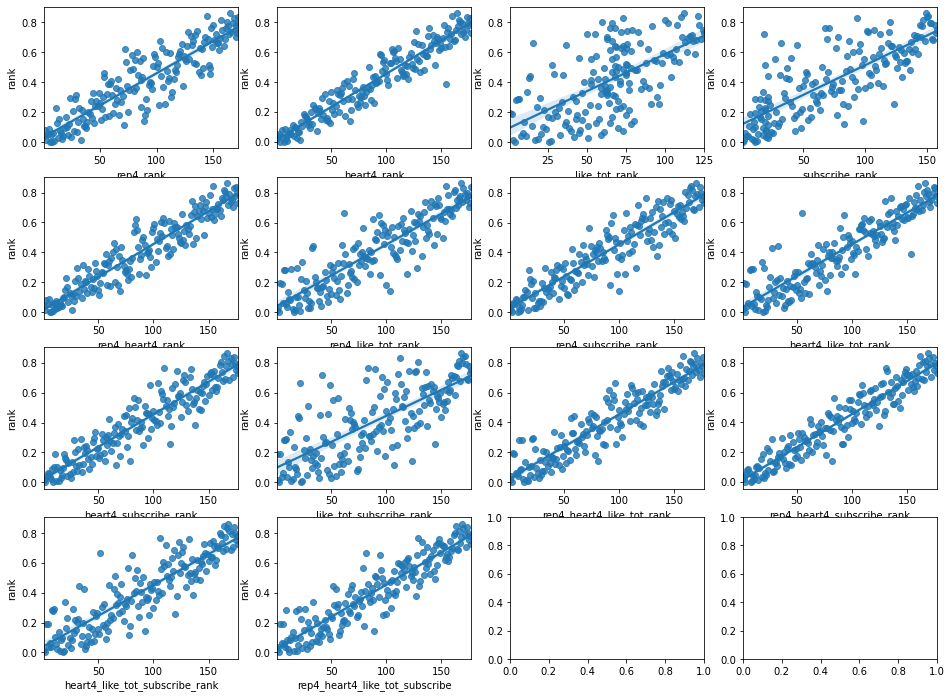

In [10]:
#산점도 선형회귀 시각화
fig, axs = plt.subplots(figsize=(16,12), nrows=4, ncols=4)
x_features = ['rep4_rank','heart4_rank','like_tot_rank','subscribe_rank',
              'rep4_heart4_rank','rep4_like_tot_rank','rep4_subscribe_rank','heart4_like_tot_rank','heart4_subscribe_rank','like_tot_subscribe_rank',
              'rep4_heart4_like_tot_rank','rep4_heart4_subscribe_rank','heart4_like_tot_subscribe_rank',
              'rep4_heart4_like_tot_subscribe']
    
    
    

    
for i, feature in enumerate(x_features):    #인덱스와 밸류 같이 가져오는 enumerate를 쓰고, i, feature 사용
    row=int(i/4)  #행번호 
    col = i%4     #열번호
    #산점도와 회귀선 시각화
    sns.regplot(x=feature, y='rank', data=data, ax=axs[row][col])

<AxesSubplot:xlabel='rep4_heart4_subscribe_rank', ylabel='rank'>

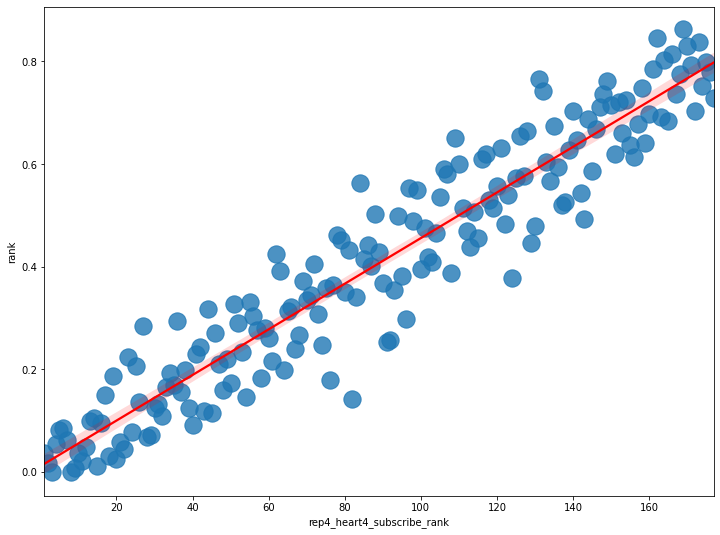

In [32]:
#산점도 선형회귀 시각화
fig, axs = plt.subplots(figsize=(12,9))
x_features = ['rep4_heart4_subscribe_rank']
    
    
    
sns.regplot(x='rep4_heart4_subscribe_rank', y='rank', data=data, scatter_kws={'s':300},line_kws={'color':'red'})

                                rep4_rank  heart4_rank  like_tot_rank  \
rep4_rank                        1.000000     0.931593       0.559256   
heart4_rank                      0.931593     1.000000       0.592772   
like_tot_rank                    0.559256     0.592772       1.000000   
subscribe_rank                   0.704420     0.751112       0.899220   
rep4_heart4_rank                 0.981973     0.981620       0.584786   
rep4_like_tot_rank               0.916514     0.884128       0.790446   
rep4_subscribe_rank              0.926164     0.918055       0.784205   
heart4_like_tot_rank             0.856040     0.917079       0.809586   
heart4_subscribe_rank            0.880197     0.941228       0.791130   
like_tot_subscribe_rank          0.666036     0.707153       0.947262   
rep4_heart4_like_tot_rank        0.936287     0.946911       0.744678   
rep4_heart4_subscribe_rank       0.947188     0.965587       0.724990   
heart4_like_tot_subscribe_rank   0.816544     0.874

<AxesSubplot:>

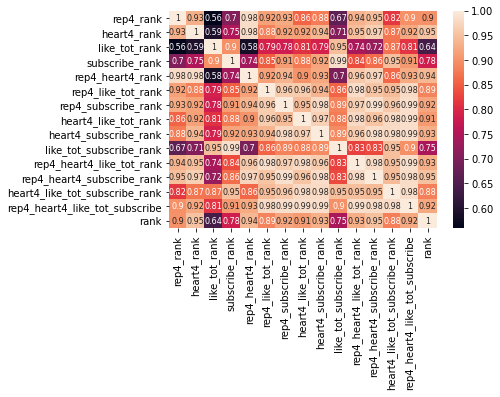

In [30]:
#히트맵으로 공분산 확인
ccol=['rep4_rank','heart4_rank','like_tot_rank','subscribe_rank',
              'rep4_heart4_rank','rep4_like_tot_rank','rep4_subscribe_rank','heart4_like_tot_rank','heart4_subscribe_rank','like_tot_subscribe_rank',
              'rep4_heart4_like_tot_rank','rep4_heart4_subscribe_rank','heart4_like_tot_subscribe_rank',
              'rep4_heart4_like_tot_subscribe','rank']

corrs = data[ccol].corr()
print(corrs)

sns.heatmap(corrs, annot=True, annot_kws={'size':8})

# 타겟넣기

In [4]:
#타겟값 넣기
ew_0['www']=ew_0[['like4','rep4','subscribe']].mean(axis=1)
ew_0['y']=ew_0[['recent_like4','recent_rep4','subscribe']].mean(axis=1)

In [5]:
ew_0 = ew_0.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis='columns')
ew_0.to_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_0_list_final.csv', encoding='utf-8-sig')
ew_0

,url_list,rate,title,author,description,genre,max_ep,like_tot_sum,subscribe,rank,...,senti1_4,senti2_4,senti3_4,FoDoDic1_4,FoDoDic2_4,FoDoDic3_4,slope_heart_4,slope_rep_4,www,y
0,https://www.webtoons.com/en/romance/subzero/li...,0.955172,SubZero,Junepurrr,What would you sacrifice to save your family? ...,Romance,103,0.325665,0.844058,0.020833,...,1.37500,0.06250,0.74450,2.527401,0.126879,0.860502,0.620766,0.237582,0.810092,0.809818
1,https://www.webtoons.com/en/fantasy/the-first-...,0.900000,The First Night With the Duke,MSG / Teava,"A handsome, selfish noble falls for a beautifu...",Fantasy,48,0.105641,0.681196,0.057870,...,1.03125,0.56250,-0.18750,5.230072,5.700772,1.689243,0.590252,0.318826,0.751306,0.752584
2,https://www.webtoons.com/en/romance/nice-to-me...,0.965517,Nice To Meet You,Wishroomness,A ditsy university student Mew finds a lost st...,Romance,43,0.103603,0.705541,0.081019,...,-1.06250,0.71875,1.18750,8.273572,4.241860,5.024445,0.781444,0.355289,0.864787,0.862816
3,https://www.webtoons.com/en/comedy/rooftops-an...,0.813793,Rooftops & Roommates,Zaanart,"Jeb is an architecture major at university, ro...",Comedy,18,0.019291,0.503830,0.141204,...,-0.34050,0.44400,0.34375,8.014681,3.770991,1.440667,0.528721,0.259196,0.569833,0.578533
4,https://www.webtoons.com/en/horror/everything-...,0.927586,Everything is Fine,Mike Birchall,"Sam and Maggie are a normal couple, in a norma...",Horror,18,0.020075,0.530070,0.118056,...,-1.18750,-1.06250,-0.21875,2.261819,1.982608,0.706545,0.319215,0.276828,0.667695,0.669230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,https://www.webtoons.com/en/sf/seed/list?title...,0.920690,Seed,Said P.,Welcome to the future – where our world has be...,Sci-fi,88,0.050634,0.580646,0.766204,...,0.78125,0.62500,0.75000,2.639177,2.891659,2.821538,0.182100,0.278526,0.463766,0.455216
215,https://www.webtoons.com/en/drama/asterion/lis...,0.668966,Asterion,NeverDraws,When Asterion wished upon a star for a better ...,Drama,28,0.004032,0.278241,0.844907,...,-0.25000,1.31250,1.65625,3.763247,2.481713,3.323227,0.171117,0.266753,0.331422,0.332747
216,https://www.webtoons.com/en/drama/american-roa...,0.872414,American Road Trip,Patrick Flores-Scott / Little Corvus,"Ever since his brother left to serve in Iraq, ...",Drama,48,0.005974,0.305459,0.863426,...,2.96875,1.81250,0.43750,6.564644,4.394665,7.014915,0.169942,0.270531,0.268192,0.270477
217,https://www.webtoons.com/en/drama/the-shadow-p...,0.862069,The Shadow Prophet,Anne Delseit / Marissa Delbressine,The Great Prophet Godo has a place for everyon...,Drama,41,0.005698,0.284866,0.918981,...,-0.28125,0.43750,3.00000,-0.769765,-0.327864,3.362787,0.168774,0.272757,0.309464,0.328151
